In [9]:
from visualize import *

<AxesSubplot:>

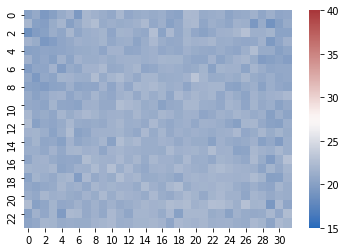

In [10]:
sns.heatmap(data[53,:,:,13] , cmap="vlag" , vmin=15 ,vmax=40)


In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import os
import scipy.stats as sc

In [86]:
n = 0.015
mean = np.zeros((235,24,32,16))
mean[0,:,:,0] = np.copy(data[0,:,:,0])
sigma = 0.4
alpha = 0.01
M = 0
gmean = np.zeros((235,24,32,16))
gp = np.zeros((235,24,32,16))
event = np.zeros((235,24,32,16))

In [87]:
maxi = -1
for l in range(0,235):
    start = 0
    if l == 0:
        start = 1
    for k in range(start,16):
        for i in range(0,24):
            for j in range(0,32):
                mean[l,i,j,k] = alpha*data[l,i,j,k]
                if k==0:
                    mean[l,i,j,k] = mean[l,i,j,k] + mean[l-1,i,j,15]*(1-alpha)
                else:
                    mean[l,i,j,k] = mean[l,i,j,k] + mean[l,i,j,k-1]*(1-alpha)
                gp[l,i,j,k] = sc.norm(mean[l,i,j,k] , sigma).pdf(data[l,i,j,k])
                if gp[l,i,j,k]<n:
                    event[l,i,j,k] = 0
                else:
                    event[l,i,j,k] = 1
                    if k!=0:
                        mean[l,i,j,k] = mean[l,i,j,k-1]
                    else:
                        mean[l,i,j,k] = mean[l-1,i,j,15]
                if gp[l,i,j,k] > maxi:
                    maxi = gp[l,i,j,k]

KeyboardInterrupt: 

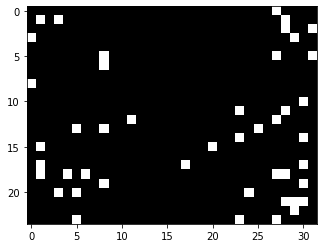

In [97]:
plt.imshow(event[40,:,:,8], cmap='Greys',  interpolation='nearest')
